# Example surrogate neural traces from different models in response to natural song

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from disp import plot_b, set_plot

FPS = 30.03
DT = 1/FPS

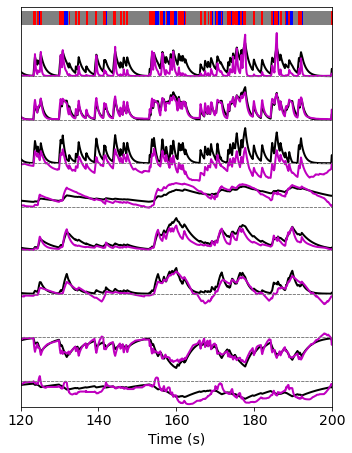

In [66]:
ITR = 25
T_START = 120
T_STOP = 200

MDLS = ['ma', 'ln2e']
COLORS = ['k', 'm']

NRNS = [171, 38, 101, 89, 126, 150, 46, 28]

fig, ax = plt.subplots(1, 1, figsize=(5, .8*len(NRNS)), tight_layout=True)

for mdl, color in zip(MDLS, COLORS):
    fname = f'data/simple/mlv/neur_basic/baker_{mdl}/mlv_baker_{mdl}_tr_{ITR}.npy'
    df_xpl = np.load(fname, allow_pickle=True)[0]['df']
    
    for cnrn, nrn in enumerate(NRNS):
        ax.plot(df_xpl['T'], df_xpl[f'R_{nrn}']/df_xpl[f'R_{nrn}'].std()/5 - cnrn, c=color, lw=2)
        ax.axhline(-cnrn, color='gray', ls='--', lw=.8)
        
    t = np.arange(len(df_xpl))*DT
    s = np.zeros(len(t))
    s[df_xpl.S == 1] = 1
    s[(df_xpl.P == 1) | (df_xpl.F == 1)] = 2
    
    b = s[(T_START <= t) & (t < T_STOP)]
    plot_b(ax, t[(T_START <= t) & (t < T_STOP)], b, extent=[T_START, T_STOP, 1.2, 1.5], c=['gray', 'b', 'r'])
    
set_plot(ax, x_lim=(T_START, T_STOP), y_lim=(-7.6, 1.6), x_ticks=np.linspace(T_START, T_STOP, 5), y_ticks=[], x_label='Time (s)', font_size=14)
fig.savefig('ms/fig1e.svg')